In [1]:
## Se demora a lo mucho: 11 seg en 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#Preprocesamiento
from sklearn.preprocessing import StandardScaler
# Modelos utilizados
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Metricas para seleccionar
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split



# Datos / análisis

In [2]:
VGSaleswoRating = "https://fernanda-bley.github.io/mineria%20/VGSales.csv"
VGSaleswRating = "https://fernanda-bley.github.io/mineria%20/VideoGameSaleswRatings.csv"

VGSales =  pd.read_csv(VGSaleswoRating)
VGSalesRatings =  pd.read_csv(VGSaleswRating)


#### Limpieza de datos

In [3]:
#Droppeamos los NaN en nuestro dataset de ratings
VGSalesRatings_noNaN = VGSalesRatings.dropna()
#Creamos un nuevo dataset quedandonos con los datos que no estan en el primer DataSet
CleanData = VGSalesRatings_noNaN[['Name', 'Critic_Score', 'Critic_Count','User_Score', 'User_Count', 'Developer','Rating']]

#Unimos los dataset con el mismo nombre
Merge = pd.merge(CleanData, VGSales, on = 'Name')
#Revisamos los NaN que tienen
Merge.isna().sum()

#Como los NaN se pueden arreglar, reemplazamos que los publishers desconocidos son Unknown y los años desconocidos por 0

Final = Merge.assign(Publisher=Merge['Publisher'].fillna('Unknown'))
Final = Final.assign(Year=Merge['Year'].fillna(0))

In [4]:
Final

,Name,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,76.0,51.0,8,322.0,Nintendo,E,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Mario Kart Wii,82.0,73.0,8.3,709.0,Nintendo,E,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,Wii Sports Resort,80.0,73.0,8,192.0,Nintendo,E,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,New Super Mario Bros.,89.0,65.0,8.5,431.0,Nintendo,E,7,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,Wii Play,58.0,41.0,6.6,129.0,Nintendo,E,8,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17431,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,3267,PS3,2014.0,Action,Konami Digital Entertainment,0.14,0.14,0.27,0.06,0.62
17432,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,6120,XOne,2014.0,Action,Konami Digital Entertainment,0.15,0.11,0.00,0.02,0.28
17433,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,8755,X360,2014.0,Action,Konami Digital Entertainment,0.07,0.06,0.01,0.01,0.15
17434,Breach,61.0,12.0,5.8,43.0,Atomic Games,T,16588,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


#### Analisis previo de datos

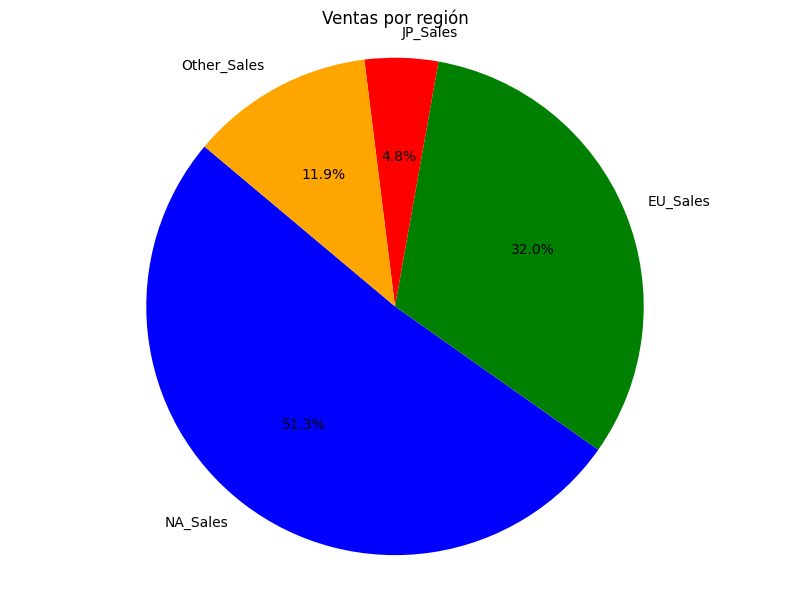

In [5]:
# Sum the sales for each region

sales_summary = {

    'NA_Sales': Final['NA_Sales'].sum(),

    'EU_Sales': Final['EU_Sales'].sum(),

    'JP_Sales': Final['JP_Sales'].sum(),

    'Other_Sales': Final['Other_Sales'].sum(),

}


# Convert sales_summary to DataFrame for easier manipulation

sales_df = pd.DataFrame(sales_summary, index=[0])


# Define colors for each region

colors = {

    'NA_Sales': 'blue',    # North America

    'EU_Sales': 'green',   # Europe

    'JP_Sales': 'red',     # Japan

    'Other_Sales': 'orange' # Other regions

}


plt.figure(figsize=(8, 6))  # Set the figure size

plt.pie(sales_summary.values(), labels=sales_summary.keys(), colors=[colors[key] for key in sales_summary.keys()],

        autopct='%1.1f%%', startangle=140)


plt.title('Ventas por región')

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

plt.show()

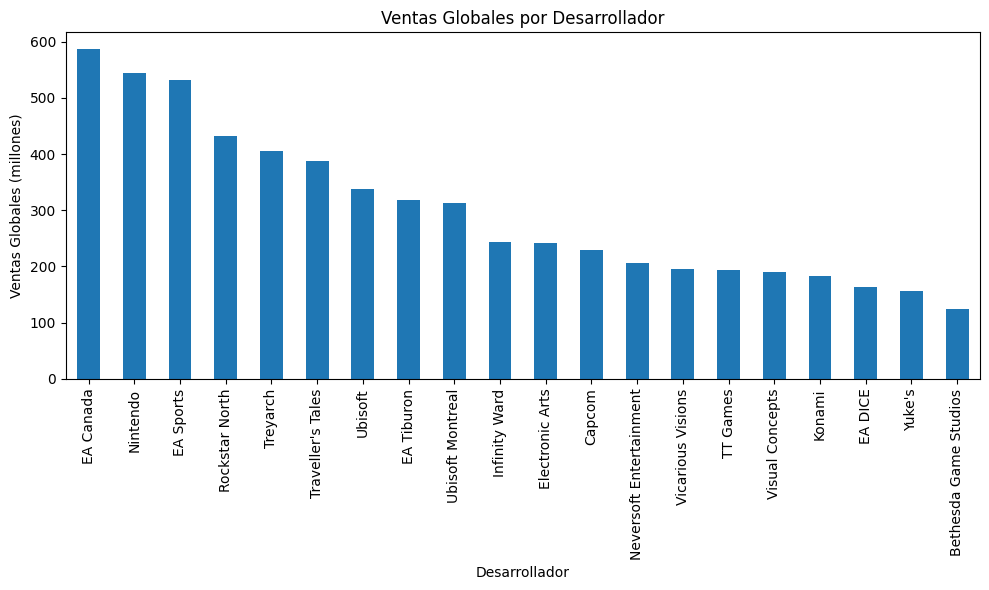

In [6]:
grouped_sales = Final.groupby('Developer')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Desarrollador')
plt.xlabel('Desarrollador')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

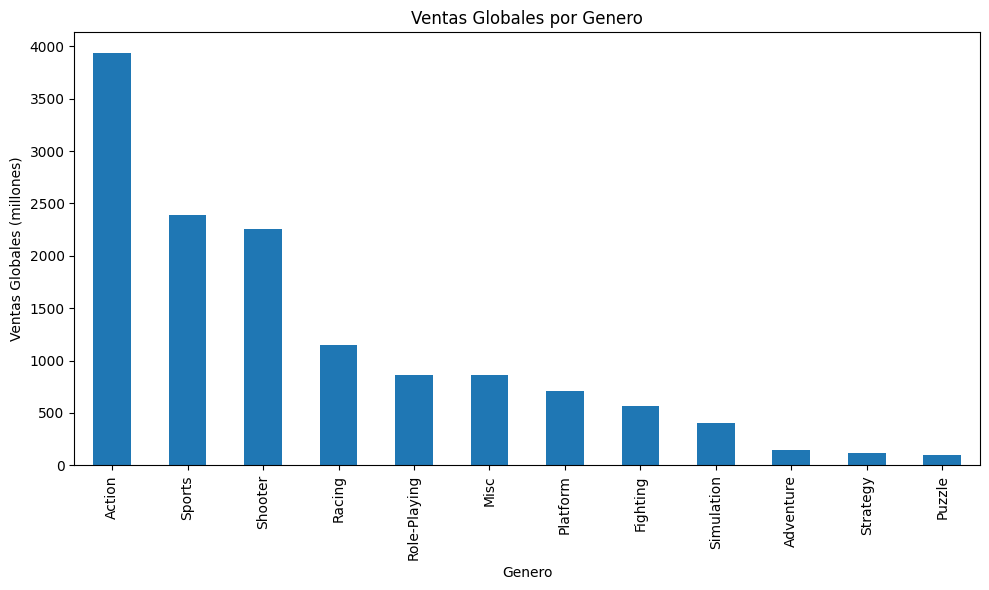

In [7]:
grouped_sales = Final.groupby('Genre')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Genero')
plt.xlabel('Genero')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

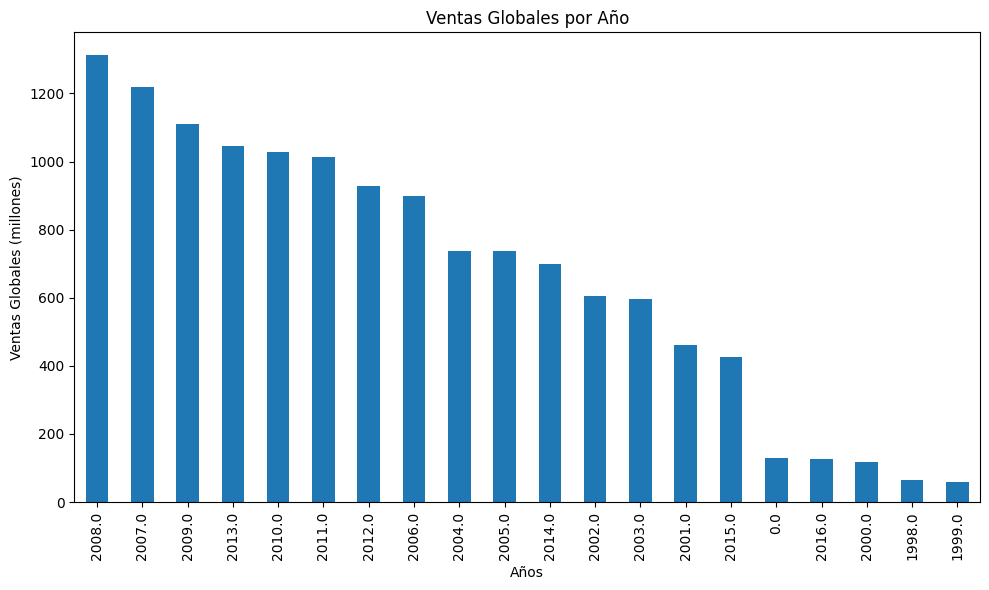

In [8]:
grouped_sales = Final.groupby('Year')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Año')
plt.xlabel('Años')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

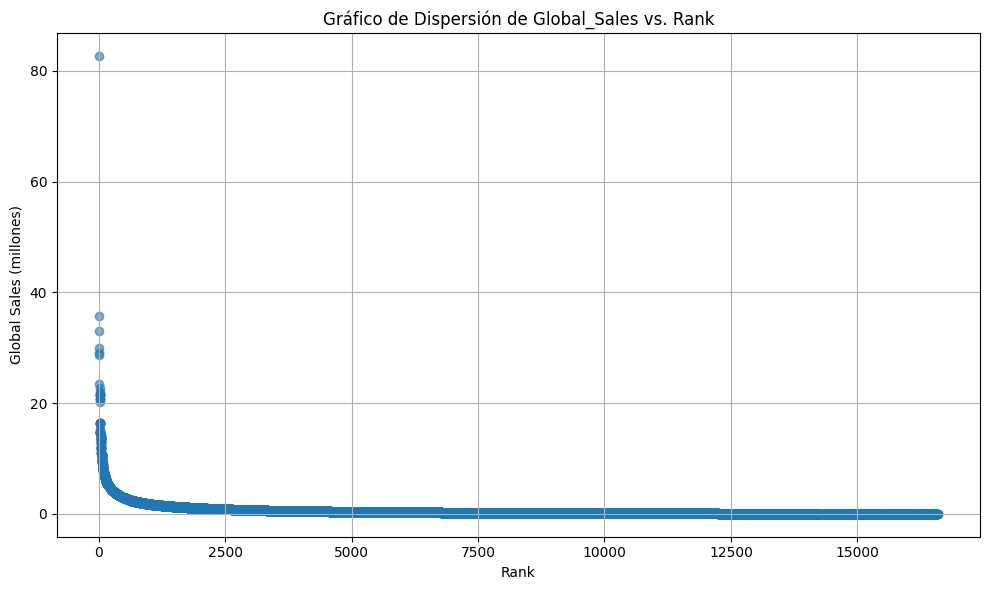

In [9]:
# Asegúrate de que 'Rank' y 'Global_Sales' son numéricos
Final['Rank'] = pd.to_numeric(Final['Rank'], errors='coerce')
Final['Global_Sales'] = pd.to_numeric(Final['Global_Sales'], errors='coerce')

# Eliminar filas con NaN en las columnas relevantes (opcional)
Final = Final.dropna(subset=['Rank', 'Global_Sales'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(Final['Rank'], Final['Global_Sales'], alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Gráfico de Dispersión de Global_Sales vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Global Sales (millones)')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## Creando el modelo

In [10]:
# Recuperemos todos las columnas no númericas

Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17436 entries, 0 to 17435
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          17436 non-null  object 
 1   Critic_Score  17436 non-null  float64
 2   Critic_Count  17436 non-null  float64
 3   User_Score    17436 non-null  object 
 4   User_Count    17436 non-null  float64
 5   Developer     17436 non-null  object 
 6   Rating        17436 non-null  object 
 7   Rank          17436 non-null  int64  
 8   Platform      17436 non-null  object 
 9   Year          17436 non-null  float64
 10  Genre         17436 non-null  object 
 11  Publisher     17436 non-null  object 
 12  NA_Sales      17436 non-null  float64
 13  EU_Sales      17436 non-null  float64
 14  JP_Sales      17436 non-null  float64
 15  Other_Sales   17436 non-null  float64
 16  Global_Sales  17436 non-null  float64
dtypes: float64(9), int64(1), object(7)
memory usage: 2.3+ MB


In [11]:
#Drop todas las columnas innecesarias o que se repiten
Final = Final.drop(columns=['NA_Sales', 'EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales'])
Final

,Name,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,76.0,51.0,8,322.0,Nintendo,E,1,Wii,2006.0,Sports,Nintendo,82.74
1,Mario Kart Wii,82.0,73.0,8.3,709.0,Nintendo,E,3,Wii,2008.0,Racing,Nintendo,35.82
2,Wii Sports Resort,80.0,73.0,8,192.0,Nintendo,E,4,Wii,2009.0,Sports,Nintendo,33.00
3,New Super Mario Bros.,89.0,65.0,8.5,431.0,Nintendo,E,7,DS,2006.0,Platform,Nintendo,30.01
4,Wii Play,58.0,41.0,6.6,129.0,Nintendo,E,8,Wii,2006.0,Misc,Nintendo,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17431,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,3267,PS3,2014.0,Action,Konami Digital Entertainment,0.62
17432,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,6120,XOne,2014.0,Action,Konami Digital Entertainment,0.28
17433,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,8755,X360,2014.0,Action,Konami Digital Entertainment,0.15
17434,Breach,61.0,12.0,5.8,43.0,Atomic Games,T,16588,PC,2011.0,Shooter,Destineer,0.01


In [12]:
# Recuperemos todos las columnas no númericas
object_columns = Final.select_dtypes(include=['object']).columns
object_columns
columnas_no_numericas = {}

for index in object_columns:
    columnas_no_numericas[index] = list(Final[index])

text = 'Los valores no númericos son: '

for value in columnas_no_numericas.keys():
    if value != 'Publisher':
        text += f"{value}, "
    else:
        text += f"y {value}"
print(text)

Los valores no númericos son: Name, User_Score, Developer, Rating, Platform, Genre, y Publisher


In [13]:
# Nos saltaremos los nombres porque no afecta a la predicción

# Volvemos Los User_Score y rating a númerico
Final['User_Score'] = pd.to_numeric(Final['User_Score'], errors='coerce')  # Convert to float, coercing errors to NaN
Final['User_Score'] = Final['User_Score'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

Final['Rating'] = pd.to_numeric(Final['User_Score'], errors='coerce')  # Convert to float, coercing errors to NaN
Final['Rating'] = Final['User_Score'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

#Creamos dummies para los valores que se pueden cuantificar.
Dev_dummies = pd.get_dummies(Final['Developer'], prefix='Developer', drop_first=True)
#Platform, Genre, y Publisher
Plat_dummies = pd.get_dummies(Final['Platform'], prefix='Platform', drop_first=True)
Gen_dummies = pd.get_dummies(Final['Genre'], prefix='Genre', drop_first=True)
Pub_dummies = pd.get_dummies(Final['Publisher'], prefix='Publisher', drop_first=True)
Name_dummies = pd.get_dummies(Final['Name'], prefix='Name',drop_first=True)
Final_with_dummies = pd.concat([Final, Name_dummies, Dev_dummies, Plat_dummies, Gen_dummies, Pub_dummies], axis=1)
Final_with_dummies = Final_with_dummies.drop(columns=['Name','Developer', 'Platform', 'Genre', 'Publisher'])
Final_with_dummies[Final_with_dummies.select_dtypes(include=['bool']).columns] = Final_with_dummies.select_dtypes(include=['bool']).astype(int)
Final_with_dummies
Final = Final_with_dummies
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17436 entries, 0 to 17435
Columns: 5914 entries, Critic_Score to Publisher_inXile Entertainment
dtypes: float64(5), int64(5909)
memory usage: 786.7 MB


In [14]:
Final.head()


,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Rank,Year,Global_Sales,Name_.hack//Mutation Part 2,Name_.hack//Outbreak Part 3,...,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,76.0,51.0,8,322.0,8,1,2006.0,82.74,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82.0,73.0,8,709.0,8,3,2008.0,35.82,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80.0,73.0,8,192.0,8,4,2009.0,33.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89.0,65.0,8,431.0,8,7,2006.0,30.01,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,41.0,6,129.0,6,8,2006.0,29.02,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = Final.drop(columns=['Global_Sales'])
y = Final['Global_Sales']

: 

In [ ]:
# Como X es tan grande lo disminuiremos usando PCA. Adicionalmente lo estandaricemos 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Crearemos varios modelos y elegiremos el que mejor se comporte mejor al pasar por classification_report

regr = LogisticRegression()
KNN = KNeighborsClassifier()
tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)


: 

In [ ]:
# Hacemos los fit respectivos
regr.fit(X_train, y_train)
KNN.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Hacemos las predicciones
regr_predict = regr.predict(X_test) 
KNN_predict = KNN.predict(X_test)
tree_predict = tree.predict(X_test)


# Conclusión
